## BUSINESS UNDERSTANDING

Overview
Kenya Power and Lighting Company (KPLC) often receives a high volume of tweets from customers reporting issues, asking questions, or providing feedback.Understanding customer sentiment towards KPLC is crucial to enable automating of responses, enhancing customer service efficiency, improving response times, and reduce the manual workload on customer service teams. The goal is to develop a chatbot capable of classifying various types of tweets and generating appropriate automated responses.


## Problem Statement
KPLC needs an automated sentiment analysis system to process and categorize customer feedback from social media, particularly X formerly (Twitter) where customers frequently express their sentiments regarding KPLC's services. By accurately classifying tweets related to KPLC’s services into sentiment categories the system will be able to identify issues by pinpointing common complaints and service issues and enhance customer feedback

### Objectives

* To gauge overall customer sentiment towards KPLC's services.·   

* To Identify specific issues mentioned in the tweets, such as token problems, power outages, billing issues, etc.

* To Create a chatbot that provides appropriate responses to customer inquiries


### Challenges
1. Data Collection and Preprocessing:
Gathering relevant tweets mentioning KPLC, especially when customers use various hashtags, misspellings or slang, can be difficult. Additionally, cleaning and preprocessing the data (e.g., removing noise like unrelated tweets, abbreviations) is crucial but time-consuming.

2. Sentiment Analysis Accuracy:
Accurately classifying the sentiment of tweets can be challenging due to the informal language, sarcasm, mixed sentiments and local dialects often used on X/Twitter.

3. Identifying Specific Issues:
Extracting and categorizing specific issues (e.g power outages, billing issues) mentioned in tweets can be complex due to the diverse ways in which customers describe their problems.

4. Real-time Data Processing:
Processing a continuous stream of tweets in real-time to provide timely insights and responses is demanding in terms of computational resources and model efficiency.

5. Handling Multilingual and Local Dialects:
Tweets may be in multiple languages or include local dialects, which can complicate sentiment analysis and issue detection. 
6. Evaluating Model Performance:
Ensuring the models perform well across different contexts, languages, and over time requires ongoing evaluation and tuning.




### Proposed Solution

* Use advanced Natural Language Processing (NLP) techniques and APIs (e.g., Twitter API) to collect and preprocess tweets.

* Implement data cleaning scripts to filter out irrelevant data and normalize the text for consistent analysis. 

* Train sentiment analysis models using machine learning techniques such as supervised learning with labeled datasets

* Implement a robust pipeline using tools for real-time data streaming and processing. Integrate with scalable cloud services such as AWS or Google Cloud to ensure the system can handle large volumes of data efficiently.

* Utilize existing chatbot frameworks like Rasa, integrated with the sentiment analysis and issue categorization models. This chatbot should be able to provide relevant responses based on the sentiment and identified issues and direct users to appropriate resources or support channels.

* Incorporate multilingual NLP models and fine-tune them with local dialect data. Using translation APIs where necessary to standardize inputs before analysis.

* Set up a continuous evaluation framework using A/B testing, cross-validation and performance metrics such as accuracy, F1-score and precision/recall. Regularly retrain models with new data to adapt to evolving customer language and sentiment.



### Metrics of success:

* Sentiment Accuracy: Percentage of correctly classified sentiments (positive, negative, neutral).

* Issue Detection Rate: Number of key issues identified and addressed based on sentiment analysis.


### Conclusion
The analysis of the tweets reveals that for Kenya Power and Lightning Company(KPLC),sentiment analysis of the tweets can o along way in assisting the company to understand and deal with customer feedback.In this way,KPLC will be able to focus on identifying the main problems developing and implementing corresponding strategies for the company’s service improvement and ultimately increasing the customer satisfaction level of their customers .The company will be able to maintain their brand image and identify the impending issues before they happen.

Despite the difficulties like dealing with  vast data and identification while analyzing the social media concerns ,performing sentiment analysis by analyzing tweets is effective.Since KLC has established key performance indicators of some of its goals such as raise in customer satisfaction scores and positive trend on brand sentiment,the company can use this tool to sustain its leadership in the energy sector while at the same time strengthening its relations with customers.


## DATA CLEANING

In [1]:
# Importing all the necessary Modules
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import glob
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/gracie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gracie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gracie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Merging all CSV files into one CSV file.

In [2]:
# Specify the path of CSV files
path = r'files'  # Replace with your actual path
all_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine all CSV files
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file called kplc_df.csv
combined_df.to_csv('kplc_df.csv', index=False)


Now that we have merged all our csvs into one csv file called kplc_df, let us not look at the basic info of our data 

In [3]:
class DataInfo:
    def __init__(self, file_path):
        # Initialize by reading the CSV file into a DataFrame
        self.df = pd.read_csv(file_path)
    
    def get_shape(self):
        # Return the shape of the DataFrame
        shape = self.df.shape
        print(f"Shape of the DataFrame: {shape}")
        return shape
    
    def get_dtypes(self):
        # Return the data types of each column
        dtypes = self.df.dtypes
        print("Data types of each column:")
        print(dtypes)
        return dtypes
    
    def get_missing_values(self):
        # Return the number of missing values per column
        missing_values = self.df.isnull().sum()
        print("Missing values per feature:")
        print(missing_values)
        return missing_values
    
    def get_basic_info(self):
        # Print basic info including shape, data types, and missing values
        print("Basic Information:")
        self.get_shape()
        self.get_dtypes()
        self.get_missing_values()
    
    def remove_irrelevant_columns(self, columns_to_remove):
        # Remove only the columns that exist in the DataFrame
        existing_columns = [col for col in columns_to_remove if col in self.df.columns]
        self.df.drop(columns=existing_columns, inplace=True)
        print(f"Removed columns: {existing_columns}")
        print("Updated DataFrame:")
        print(self.df.head())
        return self.df
    
    def remove_duplicates(self):
        # Remove duplicate entries based on the 'post' column
        initial_shape = self.df.shape
        self.df.drop_duplicates(subset='Post', inplace=True)
        final_shape = self.df.shape
        print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
        print(f"New shape of the DataFrame: {final_shape}")
        return self.df

# Instantiating our class
data_info = DataInfo("kplc_df.csv")

# Get basic information about the dataset
data_info.get_basic_info()

# Remove irrelevant columns
irrelevant_columns = ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Profile Links', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Retweets', 'Tweet URL', 'Timestamp', 'Name', 'Media URL', 'Profile Lİnk']
cleaned_df = data_info.remove_irrelevant_columns(irrelevant_columns)

# Remove duplicates in the 'post' column
cleaned_df_no_duplicates = data_info.remove_duplicates()


Basic Information:
Shape of the DataFrame: (24774, 15)
Data types of each column:
Name             object
Handle           object
Media URL        object
Retweets        float64
Likes           float64
Comments        float64
Views            object
Tweet URL        object
Profile Link     object
Post Body        object
Date             object
Author           object
Post             object
Reposts         float64
Post Link        object
dtype: object
Missing values per feature:
Name            24448
Handle              0
Media URL       24750
Retweets        24763
Likes           20997
Comments         9311
Views           23572
Tweet URL       24448
Profile Link    14305
Post Body       24448
Date                0
Author            364
Post              326
Reposts         23305
Post Link       14631
dtype: int64
Removed columns: ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Retweets', 'Tweet URL', 'Name', 'Media URL']
Upd

Our kplc_df dataset has 15 features and some of the features have missing values like likes, Reposts and comments. We have opted for deletion of these columns since they are irrelevant

We also had different data Types such us floats and Objects. We then checked for duplicates and removed all the duplicated text on post columns

Let us again see how our data looks like and whether there is any missing values

In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20725 entries, 0 to 24767
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Handle  20725 non-null  object
 1   Date    20725 non-null  object
 2   Post    20724 non-null  object
dtypes: object(3)
memory usage: 647.7+ KB


Amazing there are no null values

We can now proceed to the next stage where we are going to remove any emojis present in our dataset, remove punctuation, lowercase all the posts, remove any noise such as mentions and hashtags, filter-out non-english words, lemmitize and then tokenize our data

In [5]:
cleaned_df

,Handle,Date,Post
0,@__life_of_ell__,26-Oct-23,NaN
326,@Woud_Nyathira,29-Apr,No light for 28days now and your service men w...
327,@ingoyi,29-Apr,@KenyaPower_Care No power in parliament phase ...
328,@MOGAKAAMOS,29-Apr,"@KenyaPower_Care, your KPLC staff are demandin..."
329,@PatsyJa26446841,29-Apr,Hello kenya power care AC 23798952 we still in...
...,...,...,...
24761,@kellykenneth1,25-Jun,You guys south uyoma Siaya Nyanza has been in ...
24762,@WahomeAK,25-Jun,@KenyaPower_Care @KenyaPower is there a schedu...
24763,@MishBosslady__,24-Jun,Hi....Sudden Blackout in Utawala. What gives??...
24764,@kiptoocheruyoit,24-Jun,@KenyaPower_Care have engineered a blackout he...


In [6]:
import pandas as pd
import re
import numpy as np

def remove_pattern(text, pattern_regex):
    if isinstance(text, str):
        return re.sub(pattern_regex, '', text)
    else:
        return text

# Ensure 'Post' column is processed correctly
cleaned_df['Post'] = cleaned_df['Post'].apply(lambda x: remove_pattern(x, r"@[\w]*"))

# Display the first 10 rows to check the results
print(cleaned_df.head(10))


               Handle       Date  \
0    @__life_of_ell__  26-Oct-23   
326    @Woud_Nyathira     29-Apr   
327           @ingoyi     29-Apr   
328       @MOGAKAAMOS     29-Apr   
329  @PatsyJa26446841     29-Apr   
330  @PatsyJa26446841     29-Apr   
331  @PatsyJa26446841     29-Apr   
332       @NthiwaJude     29-Apr   
333       @Brainloved     29-Apr   
334  @PatsyJa26446841     28-Apr   

                                                  Post  
0                                                  NaN  
326  No light for 28days now and your service men w...  
327   No power in parliament phase 5 - Maki house -...  
328  , your KPLC staff are demanding ksh.18000 to r...  
329  Hello kenya power care AC 23798952 we still in...  
330  Hello kenya power care AC 23798952 again today...  
331  Hello kenya power care AC 23798952 again like ...  
332  \nCustomer care . How long does it take to rea...  
333  \nBad service provider in ukunda, we have no p...  
334  Hello kenya power care AC 23

In [7]:
cleaned_df

,Handle,Date,Post
0,@__life_of_ell__,26-Oct-23,NaN
326,@Woud_Nyathira,29-Apr,No light for 28days now and your service men w...
327,@ingoyi,29-Apr,No power in parliament phase 5 - Maki house -...
328,@MOGAKAAMOS,29-Apr,", your KPLC staff are demanding ksh.18000 to r..."
329,@PatsyJa26446841,29-Apr,Hello kenya power care AC 23798952 we still in...
...,...,...,...
24761,@kellykenneth1,25-Jun,You guys south uyoma Siaya Nyanza has been in ...
24762,@WahomeAK,25-Jun,is there a scheduled blackout on Thika Road ...
24763,@MishBosslady__,24-Jun,Hi....Sudden Blackout in Utawala. What gives??...
24764,@kiptoocheruyoit,24-Jun,have engineered a blackout here in chebwagan ...


In [8]:
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords

class TextCleaner:
    def __init__(self, df, text_column):
        """
        Initialize the TextCleaner class with a DataFrame and the text column to clean.
        
        :param df: DataFrame containing the data
        :param text_column: The name of the column to clean
        """
        self.df = df
        self.text_column = text_column
        self.stop_words = set(stopwords.words('english'))
    
    def remove_pattern(self, text, pattern_regex):
        """Remove a specific pattern from the text."""
        return re.sub(pattern_regex, '', text)

    def handle_emojis(self, text):
        """Replace emojis with corresponding text descriptions."""
        return emoji.demojize(text, delimiters=(" ", " "))
    
    def to_lowercase(self, text):
        """Convert text to lowercase."""
        return text.lower()
    
    def remove_punctuation_numbers(self, text):
        """Remove punctuation and numbers from the text."""
        return re.sub(r'[^a-zA-Z\s]', '', text)
    
    def remove_mentions_hashtags(self, text):
        """Remove mentions (@) and hashtags (#) along with any attached words."""
        text = self.remove_pattern(text, r'@\w+')
        text = self.remove_pattern(text, r'#\w+')
        return text
    
    def remove_stopwords(self, text):
        """Remove stopwords from the text."""
        return ' '.join(word for word in text.split() if word not in self.stop_words)
    
    def clean_single_text(self, text):
        """Clean a single piece of text by applying all steps."""
        if pd.isna(text):
            return ''
        text = self.handle_emojis(text)
        text = self.to_lowercase(text)
        text = self.remove_punctuation_numbers(text)
        text = self.remove_mentions_hashtags(text)
        text = self.remove_stopwords(text)
        return text
    
    def clean_text(self):
        """Apply all cleaning steps to the specified text column in the DataFrame."""
        self.df[self.text_column] = self.df[self.text_column].apply(lambda text: self.clean_single_text(text))
        return self.df




# Instantiate our TextCleaner Class
text_cleaner = TextCleaner(cleaned_df, text_column='Post')
cleaned_df = text_cleaner.clean_text()
cleaned_df.to_csv('final_cleaned_kplc_df.csv', index=False)
print(cleaned_df.head())


               Handle       Date  \
0    @__life_of_ell__  26-Oct-23   
326    @Woud_Nyathira     29-Apr   
327           @ingoyi     29-Apr   
328       @MOGAKAAMOS     29-Apr   
329  @PatsyJa26446841     29-Apr   

                                                  Post  
0                                                       
326  light days service men want bribed ksh k resto...  
327  power parliament phase maki house katani road ...  
328  kplc staff demanding ksh restore electricity p...  
329  hello kenya power care ac still darkness power...  


## Sentiment Analysis and Text Preprocessing.

This analysis will help us understand the general sentiment towards KPLC's services and identify the key issues that are being mentioned. By looking at the sentiment associated with specific keywords, we can gain insights into which aspects of the service are causing the most dissatisfaction (or satisfaction) among users.

In [9]:
cleaned_df

,Handle,Date,Post
0,@__life_of_ell__,26-Oct-23,
326,@Woud_Nyathira,29-Apr,light days service men want bribed ksh k resto...
327,@ingoyi,29-Apr,power parliament phase maki house katani road ...
328,@MOGAKAAMOS,29-Apr,kplc staff demanding ksh restore electricity p...
329,@PatsyJa26446841,29-Apr,hello kenya power care ac still darkness power...
...,...,...,...
24761,@kellykenneth1,25-Jun,guys south uyoma siaya nyanza blackout since s...
24762,@WahomeAK,25-Jun,scheduled blackout thika road today tuko gizan...
24763,@MishBosslady__,24-Jun,hisudden blackout utawala gives kindly assist
24764,@kiptoocheruyoit,24-Jun,engineered blackout chebwagan stop us occupyin...


Sentiment Analysis Method choosem was **VADER** (Valence Aware Dictionary for sEntiment Reasoning). This is beacuse it is particularly suited for social media text due to its ability to understand the context of language used online.

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Apply sentiment analysis to each tweet
cleaned_df['Vader_sentiment_score'] = cleaned_df['Post'].apply(lambda post: sid.polarity_scores(post)['compound'])

# Classify the sentiment
cleaned_df['Vader_sentiment_label'] = cleaned_df['Vader_sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gracie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


This calculates the sentiment score for each tweet and classifies it as positive, negative, or neutral.

In [11]:
cleaned_df

,Handle,Date,Post,Vader_sentiment_score,Vader_sentiment_label
0,@__life_of_ell__,26-Oct-23,,0.0000,neutral
326,@Woud_Nyathira,29-Apr,light days service men want bribed ksh k resto...,0.7096,positive
327,@ingoyi,29-Apr,power parliament phase maki house katani road ...,0.5994,positive
328,@MOGAKAAMOS,29-Apr,kplc staff demanding ksh restore electricity p...,0.2732,positive
329,@PatsyJa26446841,29-Apr,hello kenya power care ac still darkness power...,0.1027,positive
...,...,...,...,...,...
24761,@kellykenneth1,25-Jun,guys south uyoma siaya nyanza blackout since s...,0.0000,neutral
24762,@WahomeAK,25-Jun,scheduled blackout thika road today tuko gizan...,0.0000,neutral
24763,@MishBosslady__,24-Jun,hisudden blackout utawala gives kindly assist,0.4939,positive
24764,@kiptoocheruyoit,24-Jun,engineered blackout chebwagan stop us occupyin...,0.0258,positive


Sentiment Analysis Using **TextBlob**. It is another tool that can be used for sentiment analysis, and it provides polarity (positive/negative) and subjectivity (objective/subjective) scores.

In [13]:
from textblob import TextBlob

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    
    # Determine sentiment label
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis
cleaned_df['TextBlob_Sentiment'] = cleaned_df['Post'].apply(analyze_sentiment_textblob)


Compairing the two methods of sentiment analysis, vander and one using textblob.

In [18]:
cleaned_df.head(20)

,Handle,Date,Post,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment
0,@__life_of_ell__,26-Oct-23,,0.0000,neutral,Neutral
326,@Woud_Nyathira,29-Apr,light days service men want bribed ksh k resto...,0.7096,positive,Positive
327,@ingoyi,29-Apr,power parliament phase maki house katani road ...,0.5994,positive,Neutral
328,@MOGAKAAMOS,29-Apr,kplc staff demanding ksh restore electricity p...,0.2732,positive,Neutral
329,@PatsyJa26446841,29-Apr,hello kenya power care ac still darkness power...,0.1027,positive,Positive
330,@PatsyJa26446841,29-Apr,hello kenya power care ac today every day supp...,0.7430,positive,Positive
331,@PatsyJa26446841,29-Apr,hello kenya power care ac like every day power...,0.9081,positive,Positive
332,@NthiwaJude,29-Apr,customer care long take reallocate tokens send...,0.4939,positive,Positive
333,@Brainloved,29-Apr,bad service provider ukunda power since saturd...,-0.2373,negative,Negative
334,@PatsyJa26446841,28-Apr,hello kenya power care ac getting assistance t...,0.3400,positive,Negative


### Keyword Categorization
To categorize tweets based on specific keywords like "Transformer", "Blackout", etc. We created columns for each keyword and marked the rows that mention them:

In [19]:
keywords = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']

# Create columns for each keyword
for keyword in keywords:
    cleaned_df[keyword] = cleaned_df['Post'].str.contains(keyword, case=False, na=False)


In [20]:
cleaned_df

,Handle,Date,Post,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment,transformer,bill,blackout,interruption,meter,connection,tokens,service,restored,delayed,power,stima
0,@__life_of_ell__,26-Oct-23,,0.0000,neutral,Neutral,False,False,False,False,False,False,False,False,False,False,False,False
326,@Woud_Nyathira,29-Apr,light days service men want bribed ksh k resto...,0.7096,positive,Positive,True,False,False,False,False,False,False,True,False,False,False,False
327,@ingoyi,29-Apr,power parliament phase maki house katani road ...,0.5994,positive,Neutral,False,False,False,False,False,False,False,True,False,False,True,False
328,@MOGAKAAMOS,29-Apr,kplc staff demanding ksh restore electricity p...,0.2732,positive,Neutral,False,False,False,False,False,False,False,True,False,False,False,False
329,@PatsyJa26446841,29-Apr,hello kenya power care ac still darkness power...,0.1027,positive,Positive,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,@kellykenneth1,25-Jun,guys south uyoma siaya nyanza blackout since s...,0.0000,neutral,Neutral,False,False,True,False,False,False,False,False,False,False,False,False
24762,@WahomeAK,25-Jun,scheduled blackout thika road today tuko gizan...,0.0000,neutral,Neutral,False,False,True,False,False,False,False,False,False,False,False,False
24763,@MishBosslady__,24-Jun,hisudden blackout utawala gives kindly assist,0.4939,positive,Positive,False,False,True,False,False,False,False,False,False,False,False,False
24764,@kiptoocheruyoit,24-Jun,engineered blackout chebwagan stop us occupyin...,0.0258,positive,Neutral,False,False,True,False,False,False,False,False,False,False,True,False


Ploting for both methods:

In [38]:
# Overall  vader sentiment distribution
sentiment_distribution = cleaned_df['Vader_sentiment_label'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 positive    9011
negative    6932
neutral     4782
Name: Vader_sentiment_label, dtype: int64


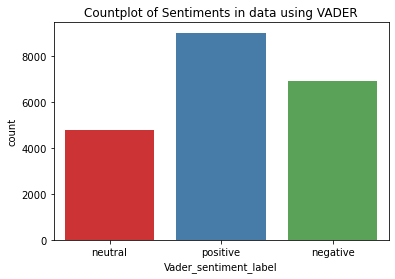

<Figure size 1000x1000 with 0 Axes>

In [40]:
# Displaying the sentiments on a countplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Vader_sentiment_label',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using VADER')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


In [48]:
# Overall textblob sentiment distribution
sentiment_distribution = cleaned_df['TextBlob_Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Positive    8202
Neutral     7961
Negative    4562
Name: TextBlob_Sentiment, dtype: int64


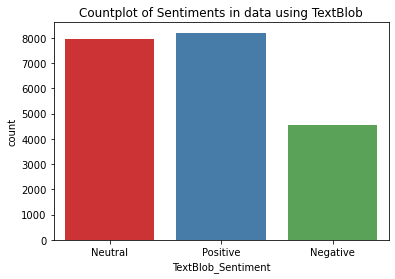

<Figure size 1000x1000 with 0 Axes>

In [41]:
sns.countplot(x = 'TextBlob_Sentiment',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using TextBlob')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


We decided to go with the VADER Sentiment Analysis method since it is more suitable to social media data like tweets.
As shown, Kenya power customer care account in X platform (KenyaPower_Care), receives more positive posts than neutral and negative. Positive posts are 9011, negative posts are 6932, and neutral posts are 4782.

Plotting to view the frequency of keywords choosen that are in the posts, that is: 'transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power' and 'stima'.


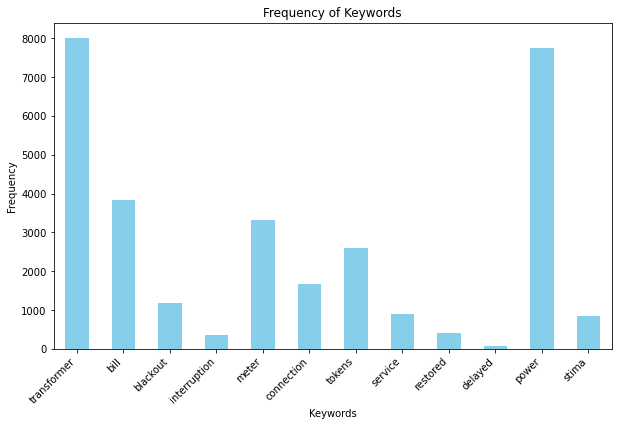

In [43]:
# Assuming your DataFrame is named df
columns_to_plot = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']


# Calculate the frequency of each keyword
frequency = cleaned_df[columns_to_plot].sum()

# Plotting the frequency
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Stima is not frequently mentioned in posts since we scrapped mostly posts in the English language. The Two most mentioned keywords are 'transformers' at over 8000 and 'power' a over 7500. This is followed by keywords 'bill', 'meter' then 'tokens'. The least mentioned keyword is 'delayed'.
This will be considered during modelling.

In [47]:
frequency

transformer     8001
bill            3831
blackout        1179
interruption     369
meter           3331
connection      1674
tokens          2599
service          885
restored         401
delayed           72
power           7746
stima            847
dtype: int64